<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/Xavier_initialization_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

#df = pd.read_csv('placement.csv')
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/ushape.csv')

Mounted at /content/drive


In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


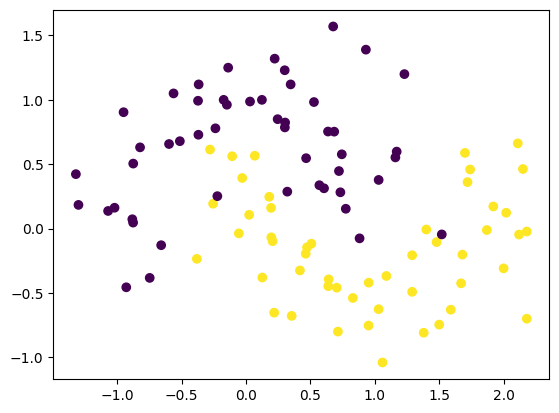

In [4]:
plt.scatter(df['X'],df['Y'], c = df['class'])

In [5]:
type(df['X'])

pandas.core.series.Series

In [6]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()

model.add(Dense(10,activation='tanh', input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.get_weights()

[array([[ 0.2907089 , -0.17389101, -0.6336308 ,  0.27034575,  0.28148937,
         -0.2651674 , -0.6915455 , -0.6426796 , -0.11114949,  0.11242419],
        [ 0.60481507,  0.08636868, -0.67952067,  0.4563374 ,  0.18851137,
          0.51460916,  0.5828107 ,  0.33479553,  0.10976303,  0.19248313]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 3.80783081e-02, -2.96530724e-02,  5.05274177e-01,
         -3.36431623e-01, -3.31567794e-01,  3.35121214e-01,
         -5.32223463e-01, -4.60617095e-01,  1.00189388e-01,
          4.79023576e-01],
        [-3.70462537e-01, -3.11478645e-01,  2.02935457e-01,
          4.81616855e-01,  2.17101038e-01,  4.95033026e-01,
          4.08366799e-01,  2.57997930e-01,  4.56713080e-01,
          3.95089328e-01],
        [ 3.39591563e-01, -1.98764205e-02, -7.21490681e-02,
         -2.66195685e-01,  2.25676954e-01,  4.40635145e-01,
         -3.30471098e-01,  4.35610056e-01,  3.97286713e-01,
         -3.6261215

In [33]:
initial_weights = model.get_weights()

In [34]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [35]:
model.set_weights(initial_weights)

In [36]:
model.get_weights()

[array([[ 0.29693753, -0.69074386,  0.26788965, -0.7957278 ,  0.7331824 ,
          0.11504063,  0.13196269,  1.4233379 , -0.6107892 , -0.29580024],
        [-0.96224284, -0.85970116,  1.4321995 , -0.32389775,  0.9538236 ,
         -0.26946023, -0.31588146,  0.2865247 ,  0.7583648 ,  0.2871098 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.25839943, -0.07331735, -0.17701524, -0.05987968,  0.11371697,
          0.16567221,  0.18856674, -0.5210303 ,  0.29211944, -0.02086542],
        [-0.3300507 ,  0.2755819 ,  0.05685686, -0.08202431,  0.15624124,
          0.52069014, -0.32675314, -0.00819545,  0.45609614,  0.19891262],
        [-0.10498982,  0.11217558, -0.19912009,  0.27884054, -0.3361445 ,
         -0.03406797,  0.10534512,  0.2920568 , -0.23393509,  0.12152454],
        [ 0.3437003 ,  0.27266547,  0.14124806, -0.18901083,  0.15414359,
          0.5874456 ,  0.42438692,  0.3366505 ,  0.38337138, -0.7942063 ],
        [ 0.72762

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history= model.fit(X,Y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 111ms/step - loss: 0.6047 - accuracy: 0.7000 - val_loss: 0.5937 - val_accuracy: 0.8500
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5896 - accuracy: 0.7625 - val_loss: 0.5733 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5763 - accuracy: 0.8125 - val_loss: 0.5531 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5623 - accuracy: 0.8250 - val_loss: 0.5340 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.5485 - accuracy: 0.8375 - val_loss: 0.5153 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.5356 - accuracy: 0.8500 - val_loss: 0.4972 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5223 - accuracy: 0.8500 - val_loss: 0.4802 - val_accuracy: 0.9000
Epoch 8/100
3/3 [==

In [39]:
model.get_weights()
#No update in weights and bias

[array([[ 0.38347244, -0.57489026,  0.20063952, -0.84568614,  0.774528  ,
          0.2030791 ,  0.18673173,  1.3244135 , -0.54855245, -0.3423588 ],
        [-0.99730086, -0.7658049 ,  1.4105228 , -0.28907958,  0.9605994 ,
         -0.30789116, -0.29620528,  0.31203324,  0.8596912 ,  0.3011235 ]],
       dtype=float32),
 array([-0.02372589,  0.08905919, -0.04596537,  0.14963026, -0.10546178,
        -0.00275398,  0.03793578,  0.17082515,  0.11255545, -0.03228046],
       dtype=float32),
 array([[ 0.20712206, -0.15583521, -0.27959114,  0.02338451,  0.1781582 ,
          0.17863847,  0.27132082, -0.5949893 ,  0.37699795, -0.07072549],
        [-0.27589902,  0.2439261 , -0.05218306, -0.02487085,  0.12044411,
          0.42420843, -0.31007594, -0.02151278,  0.40200743,  0.22761609],
        [-0.12484968,  0.15207255, -0.10813384,  0.22555855, -0.31438118,
          0.05567951,  0.06603226,  0.33348784, -0.22175363,  0.11618604],
        [ 0.38266477,  0.26411262,  0.02628619, -0.15816776, 

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

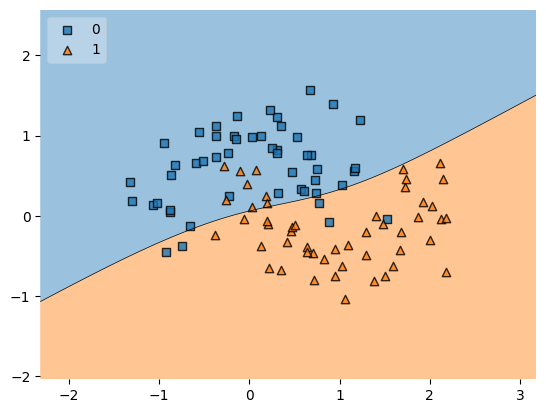

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

# tanh activation function

In [17]:
model = Sequential()

model.add(Dense(2,activation='tanh', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.get_weights()

[array([[ 0.43617964,  0.05147207],
        [ 0.1978854 , -0.9127648 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.2848436],
        [1.2044693]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
initial_weights = model.get_weights()

In [20]:
# initial_weights[0] = np.zeros(model.get_weights()[0].shape)
# initial_weights[1] = np.zeros(model.get_weights()[1].shape)
# initial_weights[2] = np.zeros(model.get_weights()[2].shape)
# initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [21]:
model.set_weights(initial_weights)

In [22]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history= model.fit(X,Y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 107ms/step - loss: 0.8525 - accuracy: 0.5000 - val_loss: 0.7754 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8497 - accuracy: 0.5000 - val_loss: 0.7729 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.8473 - accuracy: 0.5000 - val_loss: 0.7704 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.8447 - accuracy: 0.5000 - val_loss: 0.7679 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8421 - accuracy: 0.5000 - val_loss: 0.7654 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8397 - accuracy: 0.5000 - val_loss: 0.7630 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8373 - accuracy: 0.5000 - val_loss: 0.7606 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [25]:
model.get_weights()

[array([[0.7198183 , 0.7198183 ],
        [0.22318238, 0.22318238]], dtype=float32),
 array([0.25622424, 0.25622424], dtype=float32),
 array([[0.30006537],
        [0.30006537]], dtype=float32),
 array([0.25330284], dtype=float32)]